# Correlation among BTC, ETH, LTC, DOGE cryptocurrencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def read_dataset(filename):
    print('Reading data from %s' % filename)
    df = pd.read_csv(filename)
    df.Date = pd.to_datetime(df.Date) # change to datetime
    df = df.set_index('Date') 
    df = df.sort_index() # sort by datetime
    print(df.shape)
    return df

In [3]:
btc = read_dataset('BTC_PRICES_2020.csv')
eth = read_dataset('ETH_PRICES_2020.csv')
ltc = read_dataset('LTC_PRICES_2020.csv')
DOGE = read_dataset('DOGE_PRICES_2020.csv')

Reading data from BTC_PRICES_2020.csv
(366, 5)
Reading data from ETH_PRICES_2020.csv
(366, 5)
Reading data from LTC_PRICES_2020.csv
(366, 5)
Reading data from DOGE_PRICES_2020.csv
(366, 5)


In [4]:
btc.head()

,Currency,Close,Open,High,Low
Date,,,,,
2020-01-01,BTC,7179.957819,7251.277888,7298.892042,7119.626946
2020-01-02,BTC,9388.880752,9548.545376,9558.432613,9198.659041
2020-01-03,BTC,8639.591417,8778.467316,8806.844965,8591.292540
2020-01-04,BTC,6446.421347,6483.617042,6533.064909,6344.633536
2020-01-05,BTC,8767.672623,8768.047180,9469.078423,8415.474740


In [5]:
eth.head()

,Currency,Close,Open,High,Low
Date,,,,,
2020-01-01,ETH,128.722603,132.126527,133.405184,127.846577
2020-01-02,ETH,181.728434,186.328560,186.611102,175.029199
2020-01-03,ETH,223.499288,229.786046,233.269199,221.445615
2020-01-04,ETH,133.892931,133.749800,135.284805,130.613336
2020-01-05,ETH,210.620234,215.128957,227.463250,202.278779


In [6]:
ltc.head()

,Currency,Close,Open,High,Low
Date,,,,,
2020-01-01,LTC,41.213575,42.388688,42.882966,40.901041
2020-01-02,LTC,68.403032,68.979720,69.822341,65.359336
2020-01-03,LTC,59.023783,61.039843,61.698533,58.197111
2020-01-04,LTC,39.288700,39.276330,39.375602,38.498404
2020-01-05,LTC,46.974650,48.606065,50.879329,45.795808


In [7]:
DOGE.head()

,Currency,Close,Open,High,Low
Date,,,,,
2020-01-01,DOGE,0.002029,0.002025,0.002034,0.001965
2020-01-02,DOGE,0.002399,0.002435,0.002454,0.002344
2020-01-03,DOGE,0.002247,0.002344,0.002345,0.002235
2020-01-04,DOGE,0.001830,0.001851,0.001856,0.001794
2020-01-05,DOGE,0.002456,0.002525,0.002705,0.002364


In [8]:
df = pd.DataFrame({'BTC': btc.Close,
                   'ETH': eth.Close,
                   'LTC': ltc.Close,
                   'DOGE': DOGE.Close})
df.head()

,BTC,ETH,LTC,DOGE
Date,,,,
2020-01-01,7179.957819,128.722603,41.213575,0.002029
2020-01-02,9388.880752,181.728434,68.403032,0.002399
2020-01-03,8639.591417,223.499288,59.023783,0.002247
2020-01-04,6446.421347,133.892931,39.288700,0.001830
2020-01-05,8767.672623,210.620234,46.974650,0.002456


In [9]:
df.describe()

,BTC,ETH,LTC,DOGE
count,366.000000,366.000000,366.000000,366.000000
mean,11064.477459,305.981355,56.026844,0.002730
std,4194.494640,142.560966,17.732758,0.000601
min,4944.702336,107.898345,32.053195,0.001582
25%,8883.348266,200.518066,44.100596,0.002387
50%,9695.061967,244.172509,48.723677,0.002606
75%,11663.909757,389.241014,61.075483,0.003138
max,28768.836210,746.062517,129.601959,0.004938


## Visualize absolute closing prices

The chart below shows the absolute closing prices. It is not of much use as BTC closing prices are much higher than prices of ETH, LTC and DOGE

<AxesSubplot:xlabel='Date'>

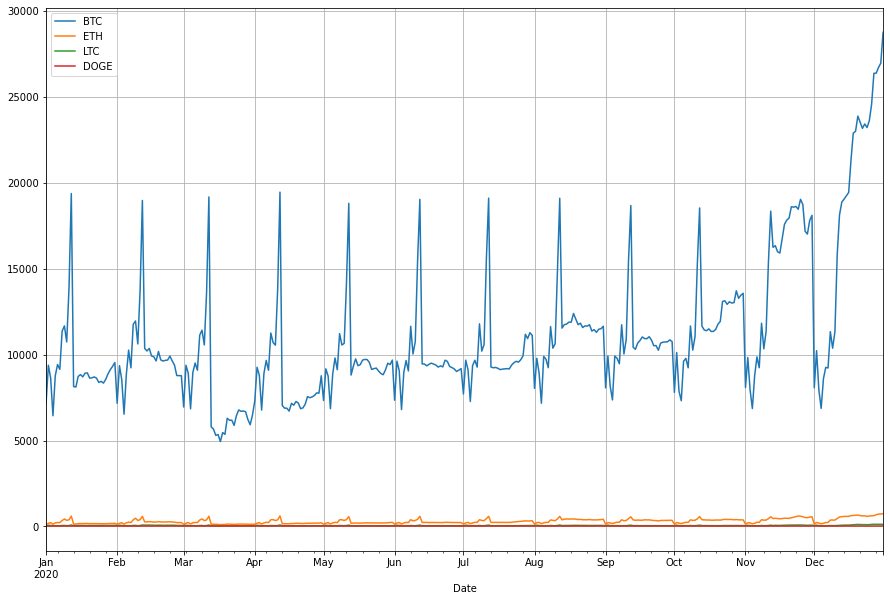

In [10]:
df.plot(grid=True, figsize=(15, 10))

## Measure the correlation of closing prices

Calculation of the Pearson correlation between the closing prices of BTC, ETH, LTC and XRP

In [11]:
# Compute the correlation matrix
corr = df.corr()
corr

,BTC,ETH,LTC,DOGE
BTC,1.000000,0.940477,0.859088,0.769831
ETH,0.940477,1.000000,0.750635,0.787964
LTC,0.859088,0.750635,1.000000,0.711197
DOGE,0.769831,0.787964,0.711197,1.000000


As the correlation matrix is symmetric, only the lower half is shown

<AxesSubplot:>

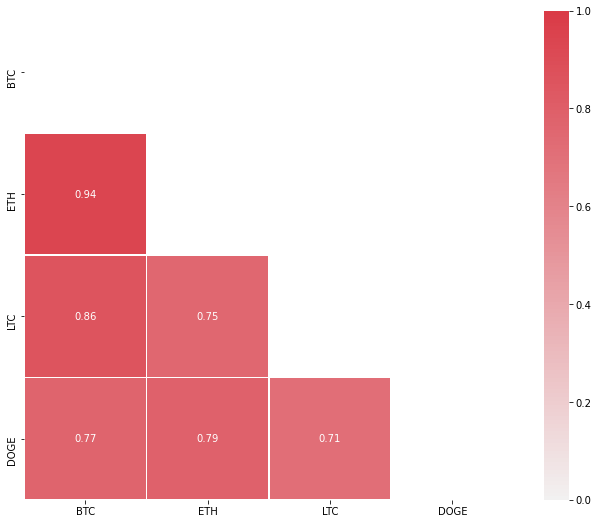

In [12]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=1, vmin=0, center=0, square=True, linewidths=.5 )


# Results

we can see from the plot that all the four BTC,ETH, LTC and DOGE are highly correlated

BTC and ETH are very highly correlated with 0.94